In [1]:
import csv
import networkx as nx
from operator import itemgetter
import community 

In [2]:
with open('quakers_nodelist.csv', 'r') as nodecsv: # 노드에 관련한 데이터를 읽어온다.                       
    nodereader = csv.reader(nodecsv) 
    
    nodes = [n for n in nodereader][1:]  #헤더정보를 빼고 가져온다.                     

node_names = [n[0] for n in nodes]  #노드의 이름만 가져온다.                            

with open('quakers_edgelist.csv', 'r') as edgecsv: # 노드끼리의 연결정보를 가져온다. 
    edgereader = csv.reader(edgecsv)      
    edges = [tuple(e) for e in edgereader][1:] # 튜플정보로 변형한다. 

In [3]:
edgereader,edges

(<_csv.reader at 0x1c60f2b4c40>,
 [('George Keith', 'Robert Barclay'),
  ('George Keith', 'Benjamin Furly'),
  ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
  ('George Keith', 'Franciscus Mercurius van Helmont'),
  ('George Keith', 'William Penn'),
  ('George Keith', 'George Fox'),
  ('George Keith', 'George Whitehead'),
  ('George Keith', 'William Bradford'),
  ('James Parnel', 'Benjamin Furly'),
  ('James Parnel', 'Stephen Crisp'),
  ('Peter Collinson', 'John Bartram'),
  ('Peter Collinson', 'James Logan'),
  ('Joseph Wyeth', 'Thomas Ellwood'),
  ('Alexander Skene of Newtyle', 'Lilias Skene'),
  ('Dorcas Erbery', 'James Nayler'),
  ('William Mucklow', 'George Fox'),
  ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
  ('William Dewsbury', 'Edward Burrough'),
  ('William Dewsbury', 'George Fox'),
  ('William Dewsbury', 'John Crook'),
  ('John Audland', 'John Camm'),
  ('John Audland', 'Francis Howgill'),
  ('John Audland', 'Edward Pyott'),
  ('John Audland'

In [4]:
nodes

[['Joseph Wyeth', 'religious writer', 'male', '1663', '1731', '10013191'],
 ['Alexander Skene of Newtyle',
  'local politician and author',
  'male',
  '1621',
  '1694',
  '10011149'],
 ['James Logan',
  'colonial official and scholar',
  'male',
  '1674',
  '1751',
  '10007567'],
 ['Dorcas Erbery', 'Quaker preacher', 'female', '1656', '1659', '10003983'],
 ['Lilias Skene',
  'Quaker preacher and poet',
  'male',
  '1626',
  '1697',
  '10011152'],
 ['William Mucklow', 'religious writer', 'male', '1630', '1713', '10008595'],
 ['Thomas Salthouse',
  'Quaker preacher and writer',
  'male',
  '1630',
  '1691',
  '10010643'],
 ['William Dewsbury', 'Quaker activist', 'male', '1621', '1688', '10003478'],
 ['John Audland', 'Quaker preacher', 'male', '1630', '1664', '10000411'],
 ['Richard Claridge',
  'Quaker minister and schoolmaster',
  'male',
  '1649',
  '1723',
  '10002469'],
 ['William Bradford', 'printer', 'male', '1663', '1752', '10001445'],
 ['Fettiplace Bellers',
  'philosophical wri

In [5]:
edges

[('George Keith', 'Robert Barclay'),
 ('George Keith', 'Benjamin Furly'),
 ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
 ('George Keith', 'Franciscus Mercurius van Helmont'),
 ('George Keith', 'William Penn'),
 ('George Keith', 'George Fox'),
 ('George Keith', 'George Whitehead'),
 ('George Keith', 'William Bradford'),
 ('James Parnel', 'Benjamin Furly'),
 ('James Parnel', 'Stephen Crisp'),
 ('Peter Collinson', 'John Bartram'),
 ('Peter Collinson', 'James Logan'),
 ('Joseph Wyeth', 'Thomas Ellwood'),
 ('Alexander Skene of Newtyle', 'Lilias Skene'),
 ('Dorcas Erbery', 'James Nayler'),
 ('William Mucklow', 'George Fox'),
 ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
 ('William Dewsbury', 'Edward Burrough'),
 ('William Dewsbury', 'George Fox'),
 ('William Dewsbury', 'John Crook'),
 ('John Audland', 'John Camm'),
 ('John Audland', 'Francis Howgill'),
 ('John Audland', 'Edward Pyott'),
 ('John Audland', 'Charles Marshall'),
 ('John Audland', 'George Fox'),
 

In [6]:
node_names , len(node_names) 

(['Joseph Wyeth',
  'Alexander Skene of Newtyle',
  'James Logan',
  'Dorcas Erbery',
  'Lilias Skene',
  'William Mucklow',
  'Thomas Salthouse',
  'William Dewsbury',
  'John Audland',
  'Richard Claridge',
  'William Bradford',
  'Fettiplace Bellers',
  'John Bellers',
  'Isabel Yeamans',
  'George Fox the younger',
  'George Fox',
  'John Stubbs',
  'Anne Camm',
  'John Camm',
  'Thomas Camm',
  'Katharine Evans',
  'Lydia Lancaster',
  'Samuel Clarridge',
  'Thomas Lower',
  'Gervase Benson',
  'Stephen Crisp',
  'James Claypoole',
  'Thomas Holme',
  'John Freame',
  'John Swinton',
  'William Mead',
  'Henry Pickworth',
  'John Crook',
  'Gilbert Latey',
  'Ellis Hookes',
  'Joseph Besse',
  'James Nayler',
  'Elizabeth Hooten',
  'George Whitehead',
  'John Whitehead',
  'William Crouch',
  'Benjamin Furly',
  'Silvanus Bevan',
  'Robert Rich',
  'John Whiting',
  'Christopher Taylor',
  'Thomas Lawson',
  'Richard Farnworth',
  'William Coddington',
  'Thomas Taylor',
  'Richa

In [7]:
#노드와 엣지의 총 개수
print(len(node_names))
print(len(edges))

119
174


In [8]:
G = nx.Graph() # 그래프 객체를 초기화합니다.                                                
G.add_nodes_from(node_names) # G객체에 노드를 추가합니다.                            
G.add_edges_from(edges) # G객체에 엣지를 추가합니다. 
print(nx.info(G)) # G객체의 정보를 출력합니다. 

Graph with 119 nodes and 174 edges


C:\Users\taehwan\AppData\Local\Temp\ipykernel_21996\3690351122.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G)) # G객체의 정보를 출력합니다.


In [9]:
#지금까지의 전체소스입니다. 

import csv                                                             
import networkx as nx
from operator import itemgetter
import community

# 노드리스트의 파일을 읽어옵니다. 
with open('quakers_nodelist.csv', 'r') as nodecsv:                 
    nodereader = csv.reader(nodecsv)                                       
    nodes = [n for n in nodereader][1:]                                    

# 노드의 이름을 가져옵니다. 
node_names = [n[0] for n in nodes]                                       

# 연결선 정보(엣지정보) 가져옵니다. 
with open('quakers_edgelist.csv', 'r') as edgecsv:                         
    edgereader = csv.reader(edgecsv)                                   
    edges = [tuple(e) for e in edgereader][1:]                         

# 노드의 개수와 엣지의 개수(각각 119 , 174)
print(len(node_names))  
print(len(edges))                                                                               

G = nx.Graph() # 그래프 객체를 초기화합니다.                                                
G.add_nodes_from(node_names) # G객체에 노드를 추가합니다.                            
G.add_edges_from(edges) # G객체에 엣지를 추가합니다. 
print(nx.info(G)) # G객체의 정보를 출력합니다. 

119
174
Graph with 119 nodes and 174 edges


C:\Users\taehwan\AppData\Local\Temp\ipykernel_21996\2783925984.py:28: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G)) # G객체의 정보를 출력합니다.


In [10]:
#노드의 속성정보를 사전형태의 타입으로 만든다. 
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

In [11]:
for node in nodes: # 노드의 속성정보를 세팅한다. node[0]은 노드의 이름이다. 
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

In [12]:
hist_sig_dict

{'Joseph Wyeth': 'religious writer',
 'Alexander Skene of Newtyle': 'local politician and author',
 'James Logan': 'colonial official and scholar',
 'Dorcas Erbery': 'Quaker preacher',
 'Lilias Skene': 'Quaker preacher and poet',
 'William Mucklow': 'religious writer',
 'Thomas Salthouse': 'Quaker preacher and writer',
 'William Dewsbury': 'Quaker activist',
 'John Audland': 'Quaker preacher',
 'Richard Claridge': 'Quaker minister and schoolmaster',
 'William Bradford': 'printer',
 'Fettiplace Bellers': 'philosophical writer and playwright',
 'John Bellers': 'political economist and cloth merchant',
 'Isabel Yeamans': 'Quaker preacher',
 'George Fox the younger': 'religious writer',
 'George Fox': ' a founder of the Religious Society of Friends (Quakers)',
 'John Stubbs': 'Quaker minister',
 'Anne Camm': 'Quaker preacher',
 'John Camm': 'Quaker preacher',
 'Thomas Camm': 'Quaker preacher and writer',
 'Katharine Evans': 'Quaker missionary',
 'Lydia Lancaster': 'Quaker minister',
 'Samu

In [13]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

In [14]:
G.nodes()

NodeView(('Joseph Wyeth', 'Alexander Skene of Newtyle', 'James Logan', 'Dorcas Erbery', 'Lilias Skene', 'William Mucklow', 'Thomas Salthouse', 'William Dewsbury', 'John Audland', 'Richard Claridge', 'William Bradford', 'Fettiplace Bellers', 'John Bellers', 'Isabel Yeamans', 'George Fox the younger', 'George Fox', 'John Stubbs', 'Anne Camm', 'John Camm', 'Thomas Camm', 'Katharine Evans', 'Lydia Lancaster', 'Samuel Clarridge', 'Thomas Lower', 'Gervase Benson', 'Stephen Crisp', 'James Claypoole', 'Thomas Holme', 'John Freame', 'John Swinton', 'William Mead', 'Henry Pickworth', 'John Crook', 'Gilbert Latey', 'Ellis Hookes', 'Joseph Besse', 'James Nayler', 'Elizabeth Hooten', 'George Whitehead', 'John Whitehead', 'William Crouch', 'Benjamin Furly', 'Silvanus Bevan', 'Robert Rich', 'John Whiting', 'Christopher Taylor', 'Thomas Lawson', 'Richard Farnworth', 'William Coddington', 'Thomas Taylor', 'Richard Vickris', 'Robert Barclay', 'Jane Sowle', 'Tace Sowle', 'Leonard Fell', 'Margaret Fell', 

In [15]:
G.nodes['Francis Bugg']

{'historical_significance': 'Quaker apostate',
 'gender': 'male',
 'birth_year': '1640',
 'death_year': '1727',
 'sdfb_id': '10001737'}

In [16]:
for n in G.nodes():  #세팅한 노드의 정보중 생년을 가져와서 출력한다. 
    print(n, G.nodes[n]['birth_year'])  

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

In [17]:
#지금까지의 전체 소스입니다. 

#노드의 속성정보를 사전형태의 타입으로 만든다. 
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

for node in nodes: # 노드의 속성정보를 세팅한다. node[0]은 노드의 이름이다. 
    hist_sig_dict[node[0]] = node[1] # node[1] ~ node[5]는 성별이나 탄생년도,사망년도 등을 나타낸다. 
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

# 그래프 객체에 노드의 속성정보를 세팅한다. 
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

# 노드의 속성정보 중에서 탄생년도를 가져와서 출력한다. 
for n in G.nodes():
    print(n, G.nodes[n]['birth_year'])

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

In [18]:
#네트워크의 밀도 
density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


In [19]:
#from --> to 의 최단거리

fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [20]:
#위에서 구한 최단거리의 길이 
print("Length of that path:", len(fell_whitehead_path)-1)

Length of that path: 2


In [21]:
# 네트워크의 컴포넌트는 1개인가? 즉 모두 연결이 되어 있는가? 
print(nx.is_connected(G))

# 컴포넌트의 리스트 
# 가장 큰 컴포넌트
components = nx.connected_components(G)
largest_component = max(components, key=len)

# 가장 큰 컴포넌트로 서브그래프를 만든다. 
# 서브그래프의 반경(크기)을 출력한다. 

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 8


In [22]:
largest_component

{'Alexander Parker',
 'Alice Curwen',
 'Anne Camm',
 'Anne Conway Viscountess Conway and Killultagh',
 'Anthony Pearson',
 'Anthony Sharp',
 'Benjamin Furly',
 'Charles Marshall',
 'Daniel Quare',
 'David Barclay of Ury',
 'David Lloyd',
 'Dorcas Erbery',
 'Edward Burrough',
 'Edward Haistwell',
 'Edward Pyott',
 'Elizabeth Hooten',
 'Elizabeth Leavens',
 'Ellis Hookes',
 'Francis Bugg',
 'Francis Howgill',
 'Franciscus Mercurius van Helmont',
 'George Fox',
 'George Fox the younger',
 'George Keith',
 'George Whitehead',
 'Gervase Benson',
 'Gilbert Latey',
 'Hannah Stranger',
 'Henry Pickworth',
 'Isaac Norris',
 'Isabel Yeamans',
 'James Claypoole',
 'James Logan',
 'James Nayler',
 'James Parnel',
 'Jane Sowle',
 'John Audland',
 'John Bartram',
 'John Burnyeat',
 'John Camm',
 'John Crook',
 'John Penington',
 'John Perrot',
 'John Story',
 'John Stubbs',
 'John Swinton',
 'John Whitehead',
 'John Wilkinson',
 'John ap John',
 'Joseph Besse',
 'Joseph Wyeth',
 'Leonard Fell',
 'Le

In [23]:
#이행성의 비율
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16937799043062202


In [24]:
#각각의 노드의 degree를 계산하여 도의 속성정보로 세팅한다. 
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
degree_dict

{'Joseph Wyeth': 1,
 'Alexander Skene of Newtyle': 1,
 'James Logan': 4,
 'Dorcas Erbery': 1,
 'Lilias Skene': 1,
 'William Mucklow': 1,
 'Thomas Salthouse': 2,
 'William Dewsbury': 3,
 'John Audland': 6,
 'Richard Claridge': 2,
 'William Bradford': 3,
 'Fettiplace Bellers': 1,
 'John Bellers': 1,
 'Isabel Yeamans': 1,
 'George Fox the younger': 1,
 'George Fox': 22,
 'John Stubbs': 5,
 'Anne Camm': 2,
 'John Camm': 4,
 'Thomas Camm': 3,
 'Katharine Evans': 1,
 'Lydia Lancaster': 1,
 'Samuel Clarridge': 2,
 'Thomas Lower': 1,
 'Gervase Benson': 2,
 'Stephen Crisp': 3,
 'James Claypoole': 2,
 'Thomas Holme': 2,
 'John Freame': 1,
 'John Swinton': 1,
 'William Mead': 2,
 'Henry Pickworth': 1,
 'John Crook': 4,
 'Gilbert Latey': 2,
 'Ellis Hookes': 1,
 'Joseph Besse': 2,
 'James Nayler': 16,
 'Elizabeth Hooten': 1,
 'George Whitehead': 13,
 'John Whitehead': 1,
 'William Crouch': 2,
 'Benjamin Furly': 10,
 'Silvanus Bevan': 1,
 'Robert Rich': 2,
 'John Whiting': 1,
 'Christopher Taylor': 

In [25]:
# William Penn의 노드정보 
print(G.nodes['William Penn'])

{'historical_significance': 'Quaker leader and founder of Pennsylvania', 'gender': 'male', 'birth_year': '1644', 'death_year': '1718', 'sdfb_id': '10009531', 'degree': 18}


In [26]:
# 모든 노드의 degree를 내림차순으로 나타낸다. 
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
sorted_degree

[('George Fox', 22),
 ('William Penn', 18),
 ('James Nayler', 16),
 ('George Whitehead', 13),
 ('Margaret Fell', 13),
 ('Benjamin Furly', 10),
 ('Edward Burrough', 9),
 ('George Keith', 8),
 ('Thomas Ellwood', 8),
 ('Francis Howgill', 7),
 ('John Perrot', 7),
 ('John Audland', 6),
 ('Richard Farnworth', 6),
 ('Alexander Parker', 6),
 ('John Story', 6),
 ('John Stubbs', 5),
 ('Thomas Curtis', 5),
 ('John Wilkinson', 5),
 ('William Caton', 5),
 ('Anthony Pearson', 5),
 ('James Logan', 4),
 ('John Camm', 4),
 ('John Crook', 4),
 ('John Burnyeat', 4),
 ('Rebecca Travers', 4),
 ('Mary Penington', 4),
 ('William Dewsbury', 3),
 ('William Bradford', 3),
 ('Thomas Camm', 3),
 ('Stephen Crisp', 3),
 ('Robert Barclay', 3),
 ('Tace Sowle', 3),
 ('Anthony Sharp', 3),
 ('Charles Marshall', 3),
 ('Martha Simmonds', 3),
 ('Thomas Salthouse', 2),
 ('Richard Claridge', 2),
 ('Anne Camm', 2),
 ('Samuel Clarridge', 2),
 ('Gervase Benson', 2),
 ('James Claypoole', 2),
 ('Thomas Holme', 2),
 ('William Mead

In [27]:
# 상위20순위의 degree를 나타낸다. 
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


In [28]:
betweenness_dict = nx.betweenness_centrality(G) # betweenness centrality(중개 중심성)
eigenvector_dict = nx.eigenvector_centrality(G) # eigenvector centrality(아이겐벡터 중심성) 

# 각각의 노드의 속성에 위에서 계산한 중심성을 세팅한다. 
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [29]:
#모든 노드의 중개중심성(betweenness centrality)을 출력한다. 
betweenness_dict

{'Joseph Wyeth': 0.0,
 'Alexander Skene of Newtyle': 0.0,
 'James Logan': 0.026944806605823553,
 'Dorcas Erbery': 0.0,
 'Lilias Skene': 0.0,
 'William Mucklow': 0.0,
 'Thomas Salthouse': 0.0,
 'William Dewsbury': 0.0,
 'John Audland': 0.04164936340077581,
 'Richard Claridge': 0.026944806605823553,
 'William Bradford': 0.000676034574339659,
 'Fettiplace Bellers': 0.0,
 'John Bellers': 0.0,
 'Isabel Yeamans': 0.0,
 'George Fox the younger': 0.0,
 'George Fox': 0.23683257726065216,
 'John Stubbs': 0.024316593960227152,
 'Anne Camm': 0.0008462504225216084,
 'John Camm': 0.0017637259162682885,
 'Thomas Camm': 0.004187620289315204,
 'Katharine Evans': 0.0,
 'Lydia Lancaster': 0.0,
 'Samuel Clarridge': 0.00159488973048295,
 'Thomas Lower': 0.0,
 'Gervase Benson': 0.0,
 'Stephen Crisp': 0.00038509826645419866,
 'James Claypoole': 0.012532163379621009,
 'Thomas Holme': 0.013617267854555989,
 'John Freame': 0.0,
 'John Swinton': 0.0,
 'William Mead': 0.0,
 'Henry Pickworth': 0.0,
 'John Crook': 

In [30]:
#모든 노드의 아이겐벡터 중심성(eigenvector centrality)을 출력한다. 
eigenvector_dict

{'Joseph Wyeth': 0.023938569252885733,
 'Alexander Skene of Newtyle': 8.138875606113619e-16,
 'James Logan': 0.044474460267486554,
 'Dorcas Erbery': 0.045583986235159406,
 'Lilias Skene': 8.138875606113619e-16,
 'William Mucklow': 0.06106681323567699,
 'Thomas Salthouse': 0.0954862854413877,
 'William Dewsbury': 0.11057869321157118,
 'John Audland': 0.09830889719333748,
 'Richard Claridge': 0.03745784226737176,
 'William Bradford': 0.06812170326615953,
 'Fettiplace Bellers': 8.138875606113619e-16,
 'John Bellers': 8.138875606113619e-16,
 'Isabel Yeamans': 0.03675236423658965,
 'George Fox the younger': 0.0344194722057107,
 'George Fox': 0.4491750710859924,
 'John Stubbs': 0.10693500692141822,
 'Anne Camm': 0.015584092713060996,
 'John Camm': 0.021785514186690315,
 'Thomas Camm': 0.016320721978238306,
 'Katharine Evans': 8.138875606113619e-16,
 'Lydia Lancaster': 8.138875606113619e-16,
 'Samuel Clarridge': 0.006241256686351223,
 'Thomas Lower': 0.0344194722057107,
 'Gervase Benson': 0.0

In [31]:
#상위20순위의 중개중심성을 출력한다. 
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


In [32]:
#상위 20순위의 중개 중심성을 추출한다. 
top_betweenness = sorted_betweenness[:20]

#상위 20순위의 중개 중심성을 가져와서 노드의 이름,degree와 함께 출력한다. 
for tb in top_betweenness: 
    degree = degree_dict[tb[0]]
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: William Penn | Betweenness Centrality: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness Centrality: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness Centrality: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness Centrality: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness Centrality: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness Centrality: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness Centrality: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness Centrality: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness Centrality: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness Centrality: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness Centrality: 0.0282956685

(-0.8150190664152984,
 1.0893429770967469,
 -1.1297006049510765,
 1.2023697407419573)

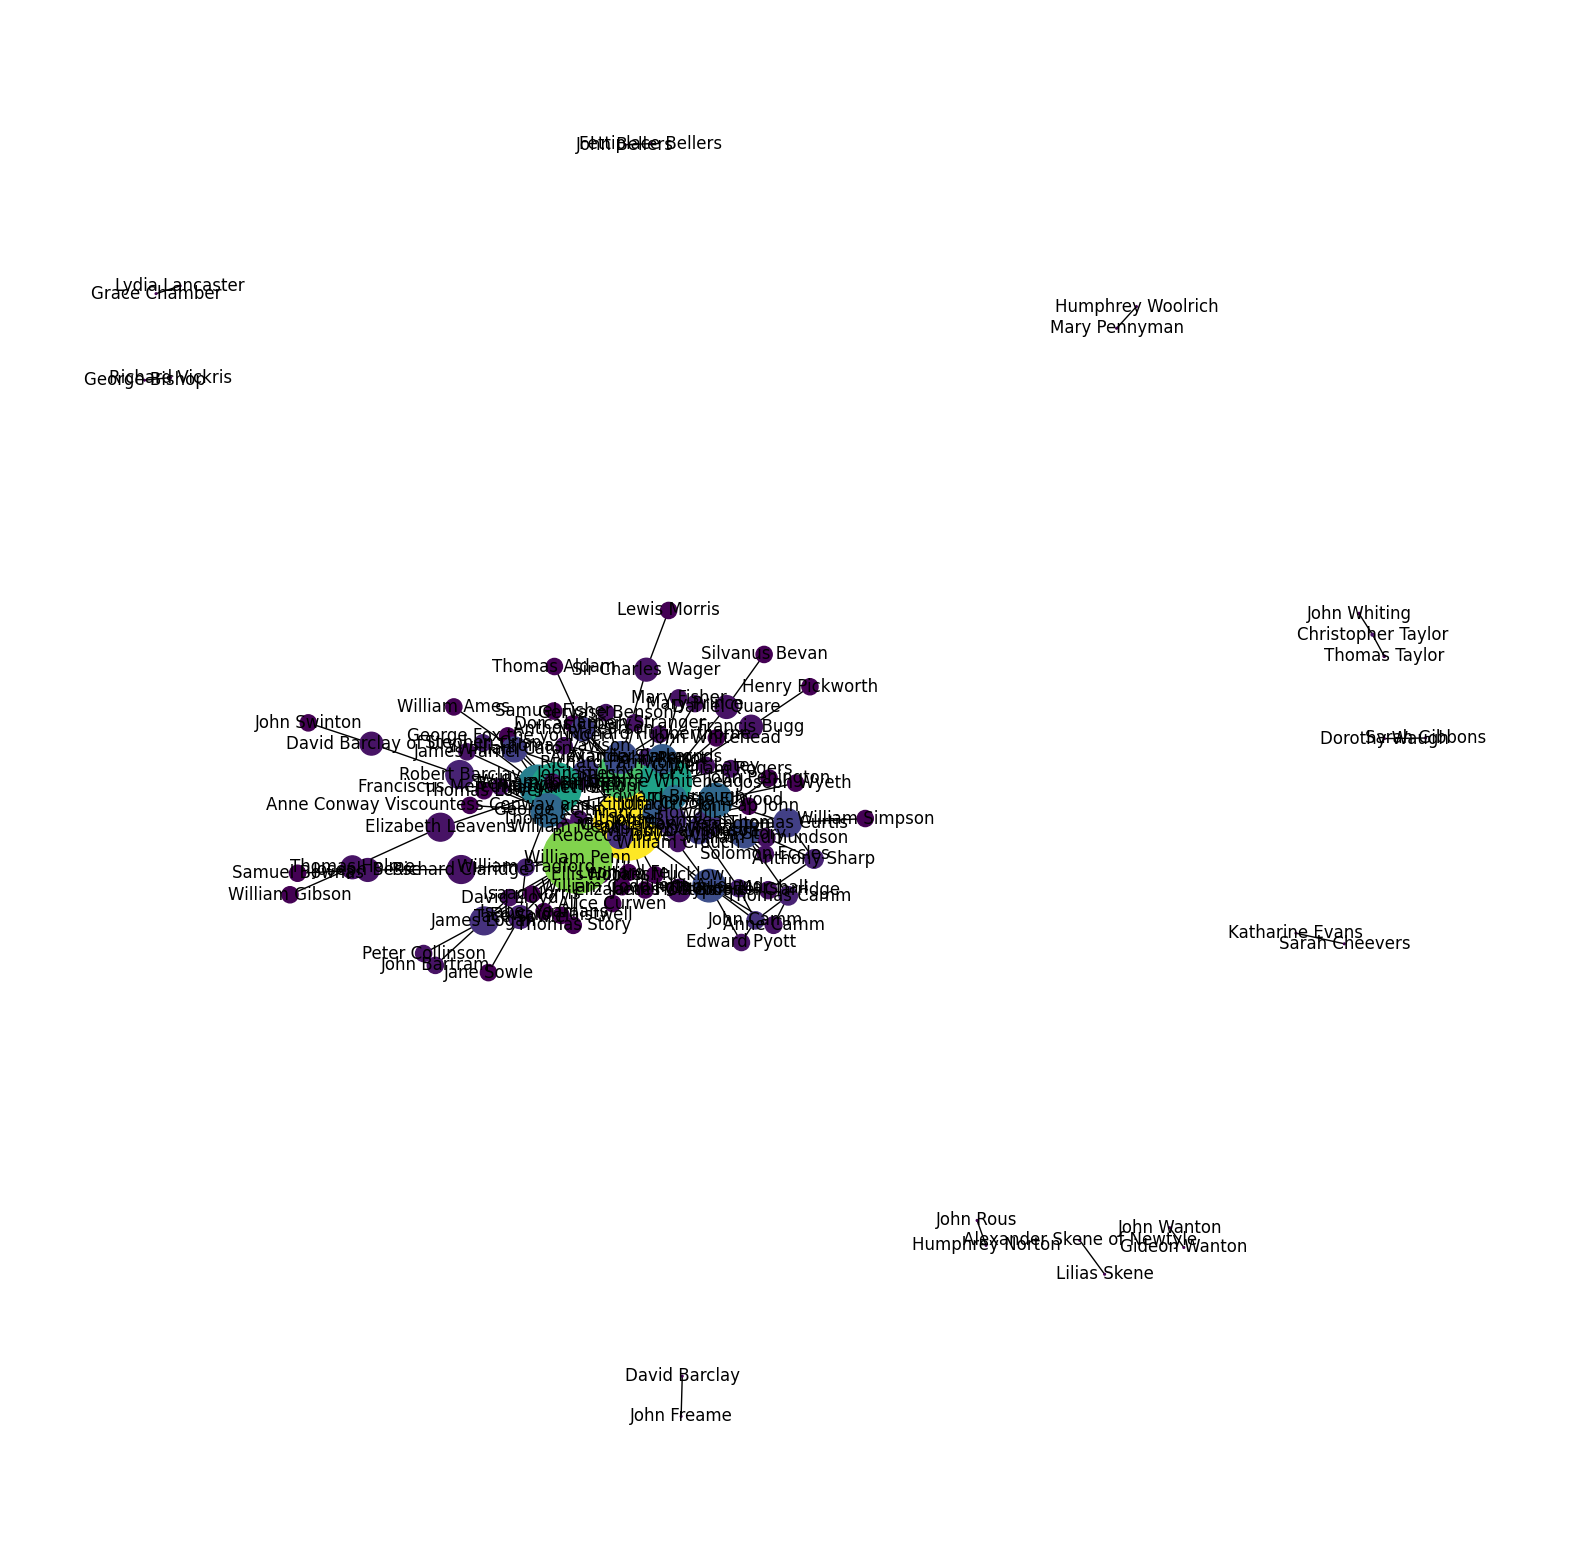

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline  

G_fb = G

#노드의 색깔은 degree의 정도이고 노드의 반지름은 중개 중심성 지수이다. 
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

(-1.149650970272938, 1.142688828888655, -0.9133639830807312, 1.181812867170567)

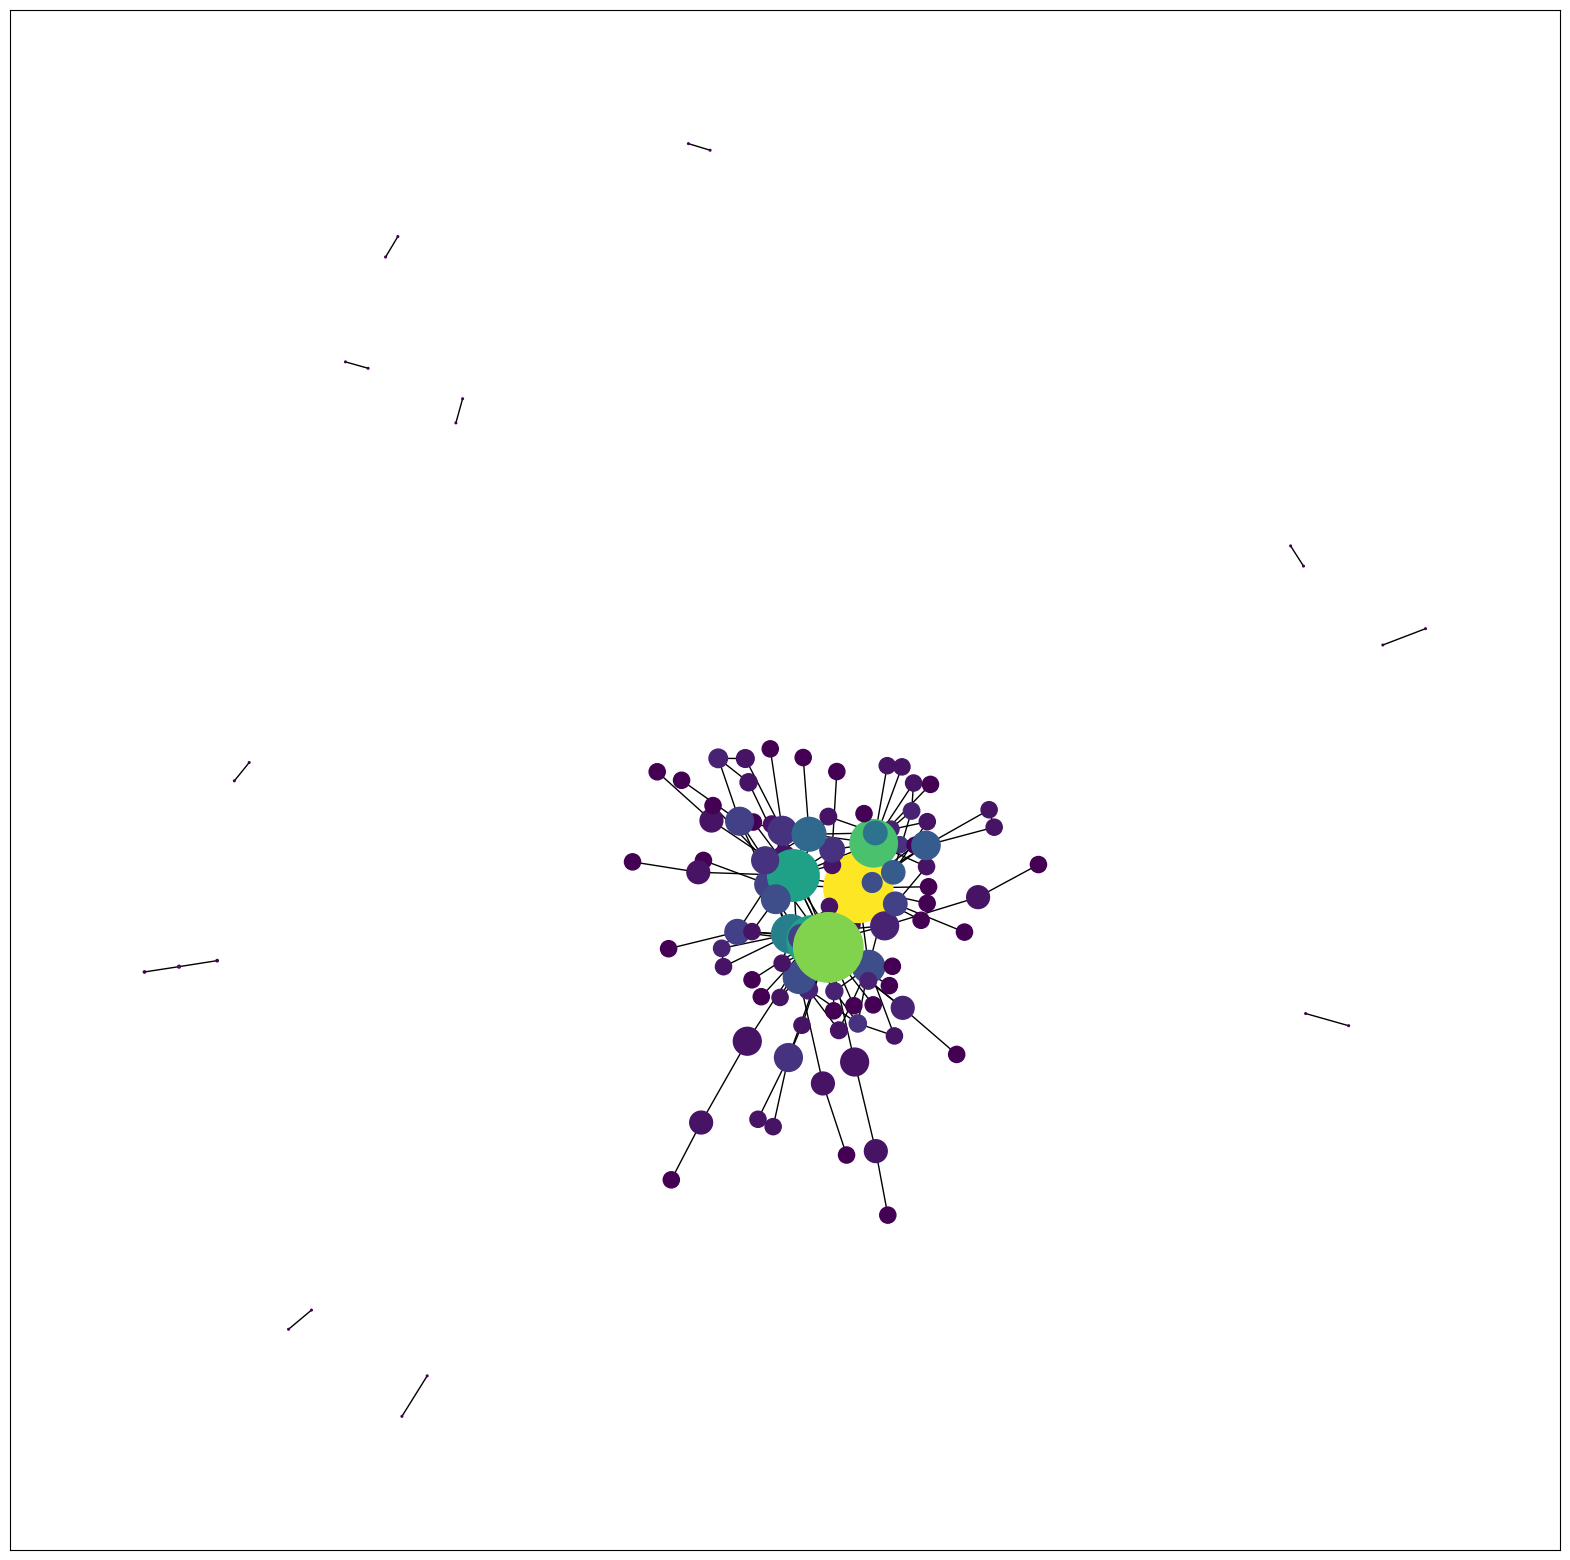

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline  

G_fb = G

pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('on')

(-1.015293946728685,
 1.1914985198248977,
 -1.0163793425751293,
 1.087802970613413)

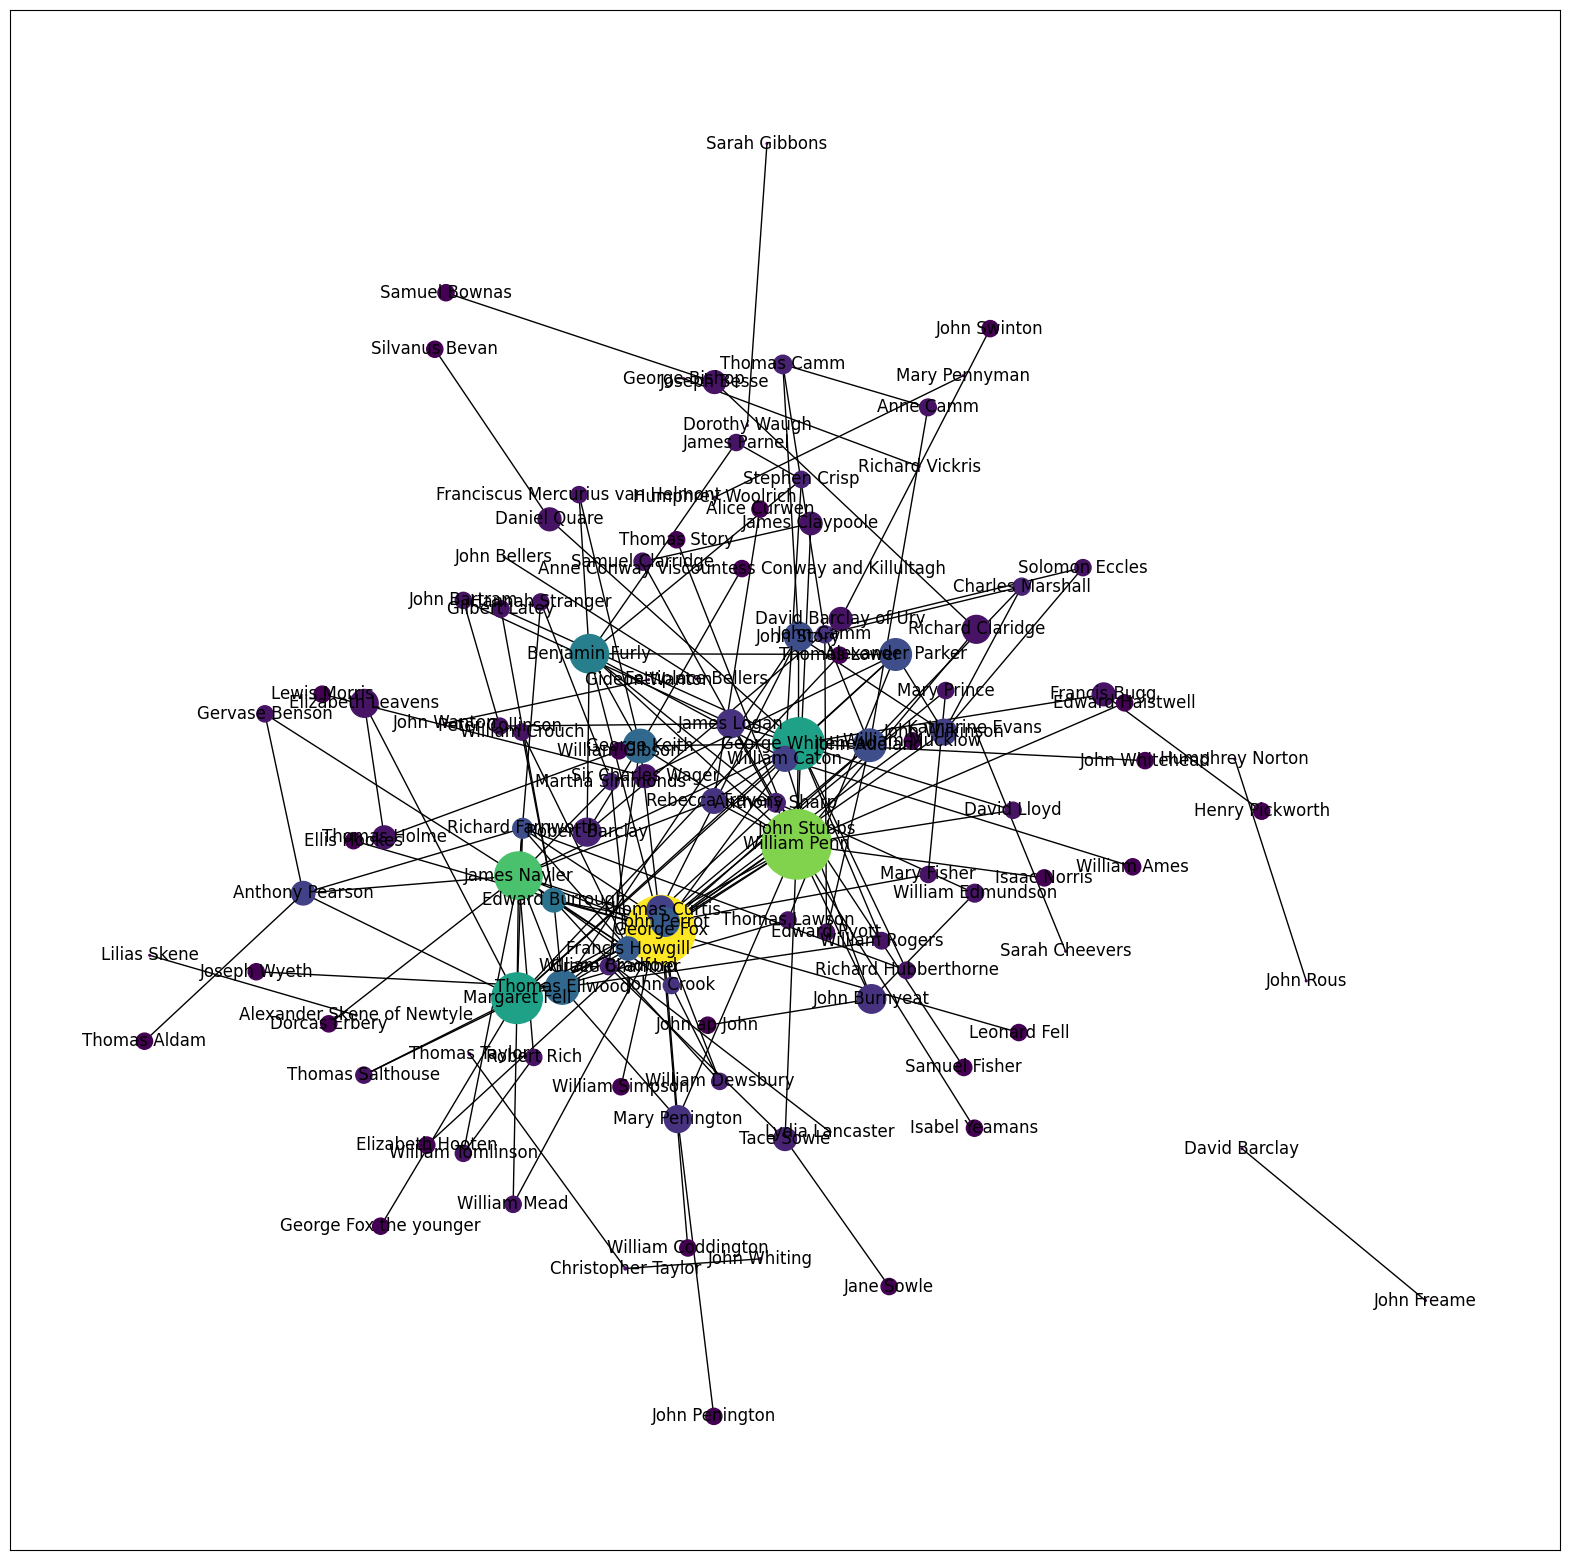

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline  

G_fb = G

pos = nx.spring_layout(G_fb , iterations = 5)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size)
plt.axis('on')